data: willhaben: apartments for sale in vienna (no other filters)

In [219]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


files = (Path.cwd() / "data").iterdir()
files = sorted(files, key=lambda x: x.name)
file = files[-1]
print(f"reading {file}")
df = pd.read_csv(file, delimiter=";")


def clean_up(df: pd.DataFrame) -> pd.DataFrame:
    # df = df.drop(columns=["link"])

    df["title"] = df["title"].str.lower()

    df["address"] = df["address"].str.extract(r"(\d{4})").replace(np.nan, 0).astype(int)

    df["price"] = df["price"].str.replace(r"[^\d.,]", "", regex=True) # only keep numbers, point and comma
    df["price"] = df["price"].str.replace(r"\.", "", regex=True) # remove thousand separator
    df["price"] = df["price"].str.replace(r",", ".", regex=True) # convert comma to point
    df["price"] = df["price"].astype(float)

    df["m2"] = df["m2"].str.extract(r"(\d+)").astype(float)

    df["num_rooms"] = df["num_rooms"].str.extract(r"(\d+)").astype(float)

    df["type"] = df["type"].str.lower()

    return df


print("length", len(df))
df = clean_up(df)
df.head()

reading /Users/sueszli/dev/will-wohnen/data/links_2024-05-24_20-00-38.csv
length 14651


,link,title,address,price,m2,num_rooms,type
0,https://www.willhaben.at/iad/immobilien/d/eige...,sonnige garten-wohnung mit stil und qualität n...,1220,298200.000,52.000,2.000,"terrasse, garten"
1,https://www.willhaben.at/iad/immobilien/d/eige...,2 zimmer genossenschaftswohnung weitergabe - s...,1100,504.790,59.000,2.000,NaN
2,https://www.willhaben.at/iad/immobilien/d/eige...,"nähe augarten! 68m², 2 zimmer",1020,299000.000,68.000,2.000,NaN
3,https://www.willhaben.at/iad/immobilien/d/eige...,gemütliche altbauwohnung mit stilvollem balkon,1090,415000.000,43.000,2.000,balkon
4,https://www.willhaben.at/iad/immobilien/d/eige...,++q18++ sanierungsbedürftige 1-zimmer altbauwo...,1100,89000.000,29.000,1.000,NaN


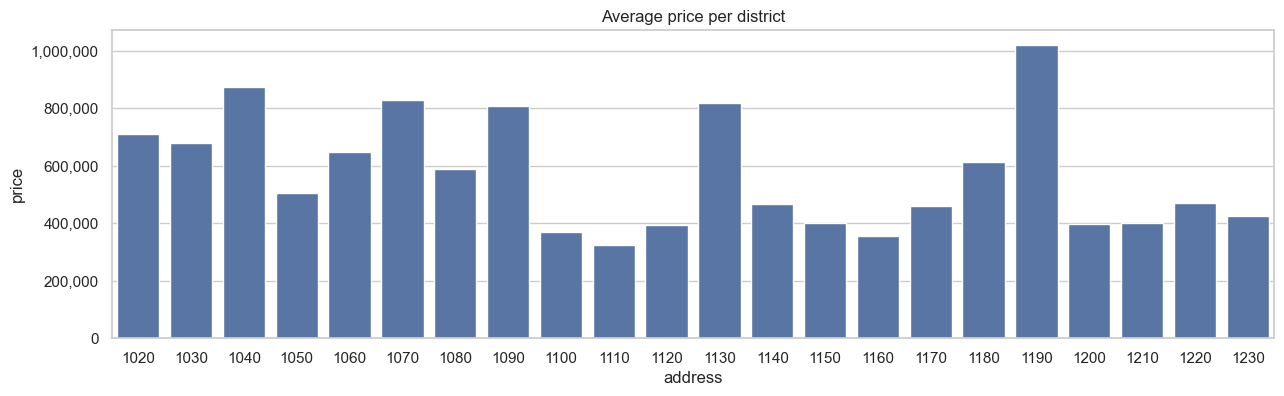

In [220]:
copy = df.copy()
copy = copy[copy["address"] != 0]
copy = copy.groupby("address")["price"].mean().reset_index()
copy = copy.sort_values(by="price", ascending=False)

# drop 1010
copy = copy[copy["address"] != 1010]

plt.figure(figsize=(15, 4))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
sns.barplot(x="address", y="price", data=copy)
plt.title("Average price per district")
plt.show()

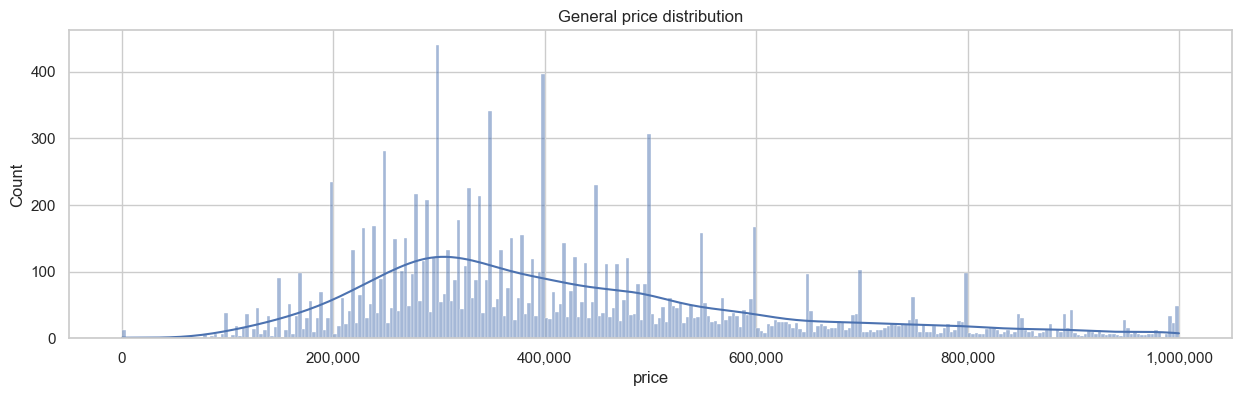

In [221]:
copy = df.copy()

# limit to 1mio
copy = copy[copy["price"] < 1_000_000]

plt.figure(figsize=(15, 4))
sns.histplot(copy["price"], bins=300, kde=True)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.title("General price distribution")
plt.show()

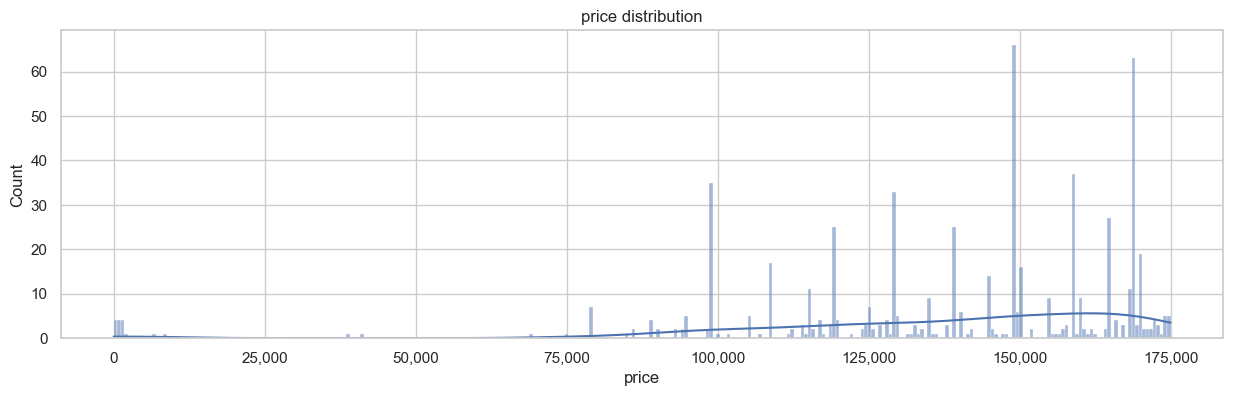

In [228]:
copy = df.copy()
copy = copy[copy["price"] < 175_000] # remove outliers

plt.figure(figsize=(15, 4))
sns.histplot(copy["price"], bins=300, kde=True)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.title("price distribution")
plt.show()